<a href="https://colab.research.google.com/github/asanka2008/test3/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

simplest monte carlo?


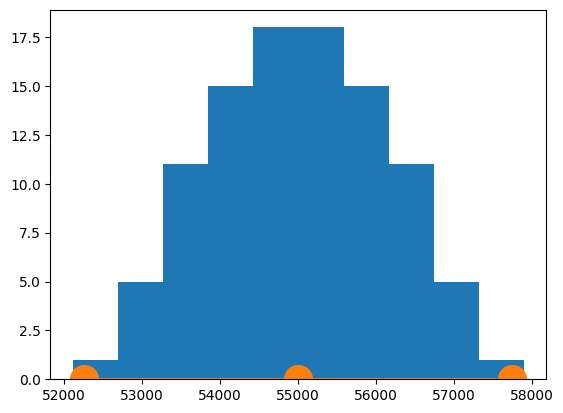

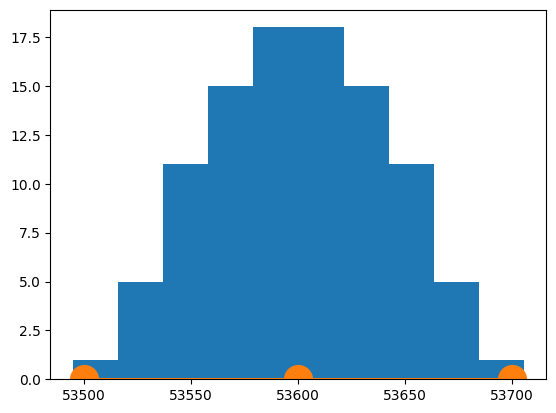

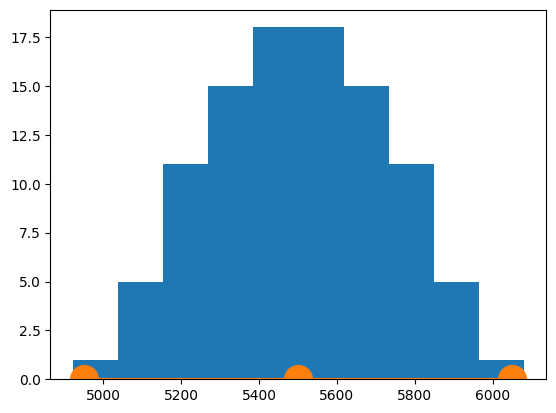

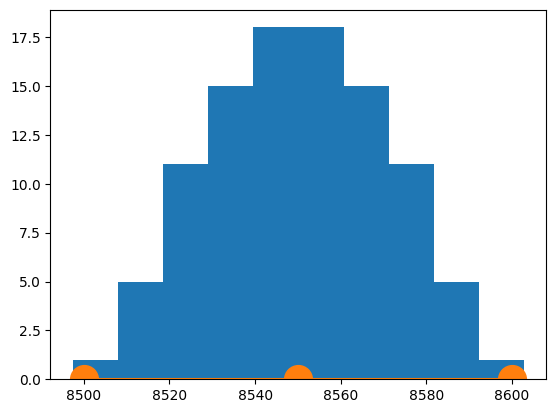

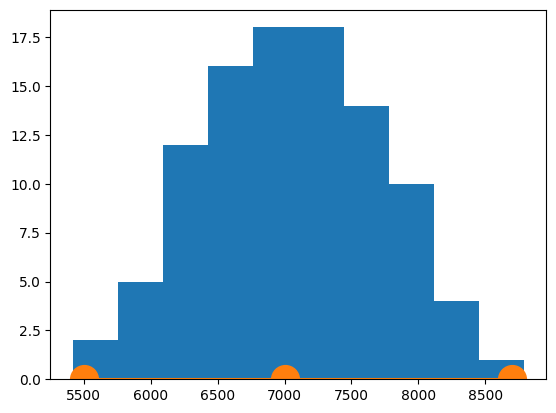

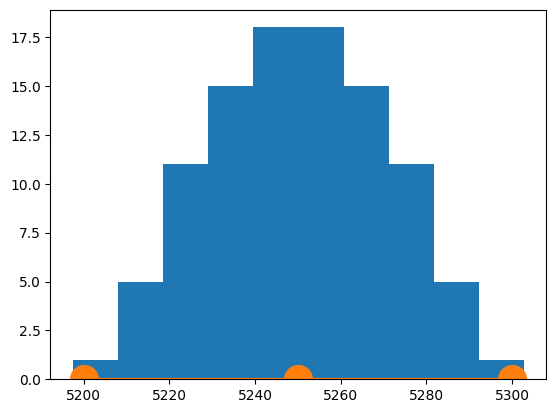

Mean is  135031 , Std Deviation is  1387 and 95% CI is  132312 to  137750


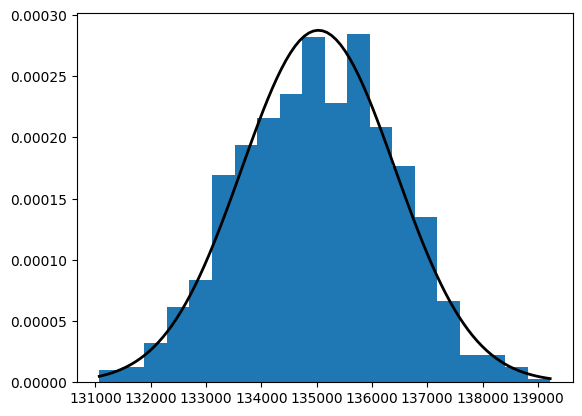

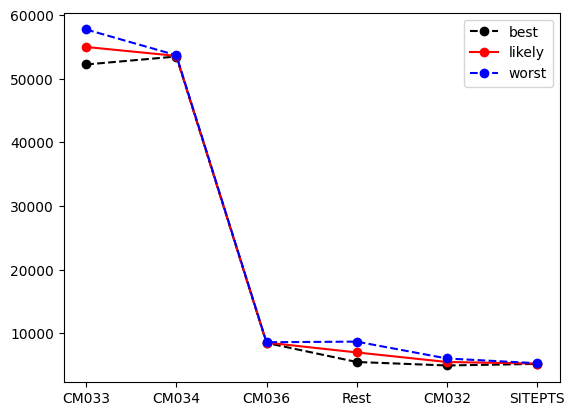

In [34]:
print("simple monte carlo example")

import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import beta
from scipy.stats import norm
import numpy as np
from random import randint


#hub weight data 52250
HubWeights = {
    'CM033' : [52250,55000,57750],
    'CM034' : [53500,53600,53700],
    'CM032' : [4950,5500,6050],
    'CM036' : [8500,8550,8600],
    'Rest' : [5500,7000,8700],
    'SITEPTS' : [5200,5250,5300]
}

#Entering hub weight data into a DataFrame named HubDataTable aka HubDT
HubDT=pd.DataFrame(HubWeights, index = ['best', 'likely', 'worst'])

#skewness of each sample data set 
factor = 4
#append 'Mean' values row at end of df
Mean = []
A = []
B = []
Y2 =pd.DataFrame([])

seeds=100
CI=.95

for x in range(len(HubDT.columns)) :
  best = HubDT.iloc[0,x]
  likely = HubDT.iloc[1,x]
  worst = HubDT.iloc[2,x]
  mean = (best+factor*likely + worst)/(2+factor)
  #shape factors a & b
  a = ( 1 + factor*((mean-best)/(worst-best)) )
  b = ( 1 + factor*((worst-mean)/(worst-best)) )
  #append, mean and a & b to each column
  Mean.append(mean)
  A.append(a)
  B.append(b)

  #populating values between best and worst based on the pert distribution
  x1 = np.linspace(0,1, seeds)
  #beta inverse normalized values for x1
  y=beta.ppf(x1,a,b)
  #beta inverse scaled values
  y1=y*(worst-best)/CI+best-(worst-best)*(1-CI)/2
  Y=pd.DataFrame(y1)
  #append Y column to Y2 dataframe
  Y2.loc[:,x]=Y
  
HubDT.loc[3,:] = Mean
HubDT.loc[4,:] = A
HubDT.loc[5,:] = B

HubDT.index =['best', 'likely', 'worst', 'mean', 'alpha', 'beta']

for x in range(len(Y2.columns)) :
  #plt.title('histograph of {:.f}'.format(HubDT.iloc[0,x]) )
  #print(HubDT.iloc[0,x])
  plt.hist(Y2[x],10)
  plt.plot([HubDT.iloc[0,x],HubDT.iloc[1,x],HubDT.iloc[2,x]],[0,0,0],marker='o',ms=20)
  plt.show()

#total sum in HubDT
A=[]
i=0
k=99
while i<1000:
  t=Y2.iloc[randint(0,k),0]+Y2.iloc[randint(0,k),1]+Y2.iloc[randint(0,k),2]+Y2.iloc[randint(0,k),3]+Y2.iloc[randint(0,k),4]+Y2.iloc[randint(0,k),5]
  A.insert(i,t)  
  i+=1

plt.hist(A,bins=20, density=True)
mu, std=norm.fit(A)
#print: mean, std and 95% confidence interval
print('Mean is ', round(mu), ', Std Deviation is ', round(std), 'and 95% CI is ', round(mu-std*1.96), 'to ', round(mu+std*1.96))

#xmin, xmax = plt.xlim() this did not work!!
xmin = min(A)
xmax = max(A)
x2 = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x2, mu, std)  
plt.plot(x2, p, 'k', linewidth=2)
plt.show()

#plot best, worst, likely values of HUB component weights sorted in descending order 
S=HubDT.sort_values(by='likely', axis=1, ascending=False)
plt.plot(S.iloc[0,:],'ko--', label='best')
plt.plot(S.iloc[1,:], 'ro-', label='likely')
plt.plot(S.iloc[2,:],'bo--', label='worst')
plt.legend()
plt.show()

